In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('Weather_Data_2010-2022.csv', index_col=0)

In [3]:
#Cleaning the Data
weather['Average temperature (°F)'] = weather['Average temperature (°F)'].str.replace('�F', "")
weather['Average humidity (%)'] = weather['Average humidity (%)'].str.replace("%","")
weather['Average dewpoint (°F)'] = weather['Average dewpoint (°F)'].str.replace('�F', "")
weather['Average barometer (in)'] = weather['Average barometer (in)'].str.replace('in.', "")
weather['Average windspeed (mph)'] = weather['Average windspeed (mph)'].str.replace('mph', "")
weather['Average gustspeed (mph)'] = weather['Average gustspeed (mph)'].str.replace('mph',"")
weather['Average direction (°deg)'] = weather['Average direction (°deg)'].map(lambda x: x.split('�')[0].rstrip())
weather['Rainfall for month (in)'] =  weather['Rainfall for month (in)'].str.replace('in.', "")
weather['Rainfall for year (in)'] =  weather['Rainfall for year (in)'].str.replace('in.', "")
weather['Maximum rain per minute'] = weather['Maximum rain per minute'].str.extract('([0-9]\.[0-9][0-9])')
weather['Maximum temperature (°F)'] = weather['Maximum temperature (°F)'].map(lambda x: x.split('�')[0].rstrip())
weather['Minimum temperature (°F)'] = weather['Minimum temperature (°F)'].map(lambda x: x.split('�')[0].rstrip())
weather['Maximum humidity (%)'] = weather['Maximum humidity (%)'].map(lambda x: x.split('%')[0].rstrip())
weather['Minimum humidity (%)'] = weather['Minimum humidity (%)'].map(lambda x: x.split('%')[0].rstrip())
weather['Maximum pressure'] = weather['Maximum pressure'].map(lambda x: x.split()[0].rstrip())
weather['Minimum pressure'] = weather['Minimum pressure'].map(lambda x: x.split()[0].rstrip())
weather['Maximum windspeed (mph)'] = weather['Maximum windspeed (mph)'].map(lambda x: x.split()[0].rstrip())
weather['Maximum gust speed (mph)'] = weather['Maximum gust speed (mph)'].map(lambda x: x.split()[0])
weather['Maximum heat index (°F)'] = weather['Maximum heat index (°F)'].map(lambda x: x.split('�')[0].rstrip())
weather=weather.astype({'Average temperature (°F)': float,'Average humidity (%)': float, 'Average dewpoint (°F)': float, 'Average barometer (in)': float, 'Average windspeed (mph)': float,
                        'Average gustspeed (mph)': float, 'Rainfall for month (in)': float, 'Rainfall for year (in)': float, 'Maximum rain per minute':float, 'Maximum temperature (°F)':float,
                        'Minimum temperature (°F)':float, 'Maximum humidity (%)': int, 'Minimum humidity (%)':int, 'Maximum pressure': float, 'Minimum pressure':float, 'Maximum windspeed (mph)':
                        float, 'Maximum gust speed (mph)':float, 'Maximum heat index (°F)':float, 'Average direction (°deg)': int})


C:\Users\mehul\AppData\Local\Temp\ipykernel_57696\3041167055.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  weather['Average barometer (in)'] = weather['Average barometer (in)'].str.replace('in.', "")
C:\Users\mehul\AppData\Local\Temp\ipykernel_57696\3041167055.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  weather['Rainfall for month (in)'] =  weather['Rainfall for month (in)'].str.replace('in.', "")
C:\Users\mehul\AppData\Local\Temp\ipykernel_57696\3041167055.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  weather['Rainfall for year (in)'] =  weather['Rainfall for year (in)'].str.replace('in.', "")


In [4]:
weather

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
Date,,,,,,,,,,,,,,,,,,,
2010-01-01,32.1,49.0,15.2,30.2,14.6,19.7,297,0.00,0.00,0.0,40.0,22.1,61,41,30.330,30.034,34.5,51.0,40.0
2010-01-02,32.1,50.0,15.5,30.1,8.8,12.2,306,0.00,0.00,0.0,39.1,22.0,77,39,30.292,29.937,23.0,35.0,39.1
2010-01-03,23.1,64.0,12.1,30.4,2.9,4.4,21,0.00,0.00,0.0,33.4,9.2,85,34,30.549,30.237,17.3,24.0,33.4
2010-01-04,25.7,48.0,7.2,30.4,4.7,7.0,324,0.00,0.00,0.0,36.5,7.6,82,25,30.585,30.107,15.0,21.0,36.5
2010-01-05,34.3,51.0,17.8,30.0,14.2,18.5,300,0.00,0.00,0.0,40.1,28.4,60,43,30.173,29.897,34.5,43.0,40.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21,56.0,20.0,15.0,29.5,10.5,16.7,254,0.26,8.57,0.0,65.4,49.3,27,11,29.691,29.312,23.0,38.0,65.4
2022-10-22,53.7,25.0,18.5,29.2,10.9,16.4,233,0.26,8.57,0.0,62.1,40.9,41,15,29.323,29.077,23.0,35.7,62.1
2022-10-23,40.7,46.0,21.2,29.1,7.3,11.3,221,0.26,8.57,0.0,51.8,30.4,65,29,29.559,28.966,26.5,36.8,51.8


In [5]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4353 entries, 2010-01-01 to 2022-10-25
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average temperature (°F)  4353 non-null   float64
 1   Average humidity (%)      4353 non-null   float64
 2   Average dewpoint (°F)     4353 non-null   float64
 3   Average barometer (in)    4353 non-null   float64
 4   Average windspeed (mph)   4353 non-null   float64
 5   Average gustspeed (mph)   4353 non-null   float64
 6   Average direction (°deg)  4353 non-null   int32  
 7   Rainfall for month (in)   4353 non-null   float64
 8   Rainfall for year (in)    4353 non-null   float64
 9   Maximum rain per minute   4353 non-null   float64
 10  Maximum temperature (°F)  4353 non-null   float64
 11  Minimum temperature (°F)  4353 non-null   float64
 12  Maximum humidity (%)      4353 non-null   int32  
 13  Minimum humidity (%)      4353 non-null   int32  
 14

In [6]:
weather.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,44.766506,49.304618,23.400666,29.870503,5.561957,9.052470,214.945785,0.452460,5.565114,0.004427,57.851987,31.132024,75.449116,26.388697,30.028017,29.699939,19.354330,29.727590,58.219159
std,15.568303,17.556278,14.770534,0.251691,3.897121,10.894434,94.404774,0.606683,4.465578,0.012469,18.109575,14.347512,17.885673,15.995349,0.258848,0.437239,11.704029,25.313945,18.215202
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.100000,-27.700000,14.000000,0.000000,29.271000,13.266000,0.000000,0.000000,-6.100000
25%,33.500000,37.000000,12.200000,29.700000,2.600000,4.300000,119.000000,0.050000,1.160000,0.000000,43.800000,22.700000,65.000000,15.000000,29.841000,29.560000,13.800000,19.600000,43.800000
50%,45.500000,48.000000,22.700000,29.800000,4.300000,6.800000,246.000000,0.230000,5.480000,0.000000,58.000000,32.700000,81.000000,23.000000,29.998000,29.708000,18.400000,26.500000,58.000000
75%,58.300000,61.000000,35.700000,30.000000,7.700000,11.600000,282.000000,0.650000,8.720000,0.010000,73.900000,42.000000,90.000000,33.000000,30.188000,29.862000,23.000000,34.500000,77.300000
max,76.300000,94.000000,55.100000,31.000000,22.300000,240.400000,360.000000,4.480000,16.410000,0.300000,92.800000,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.600000


In [7]:
weather.isna().sum()

Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
dtype: int64

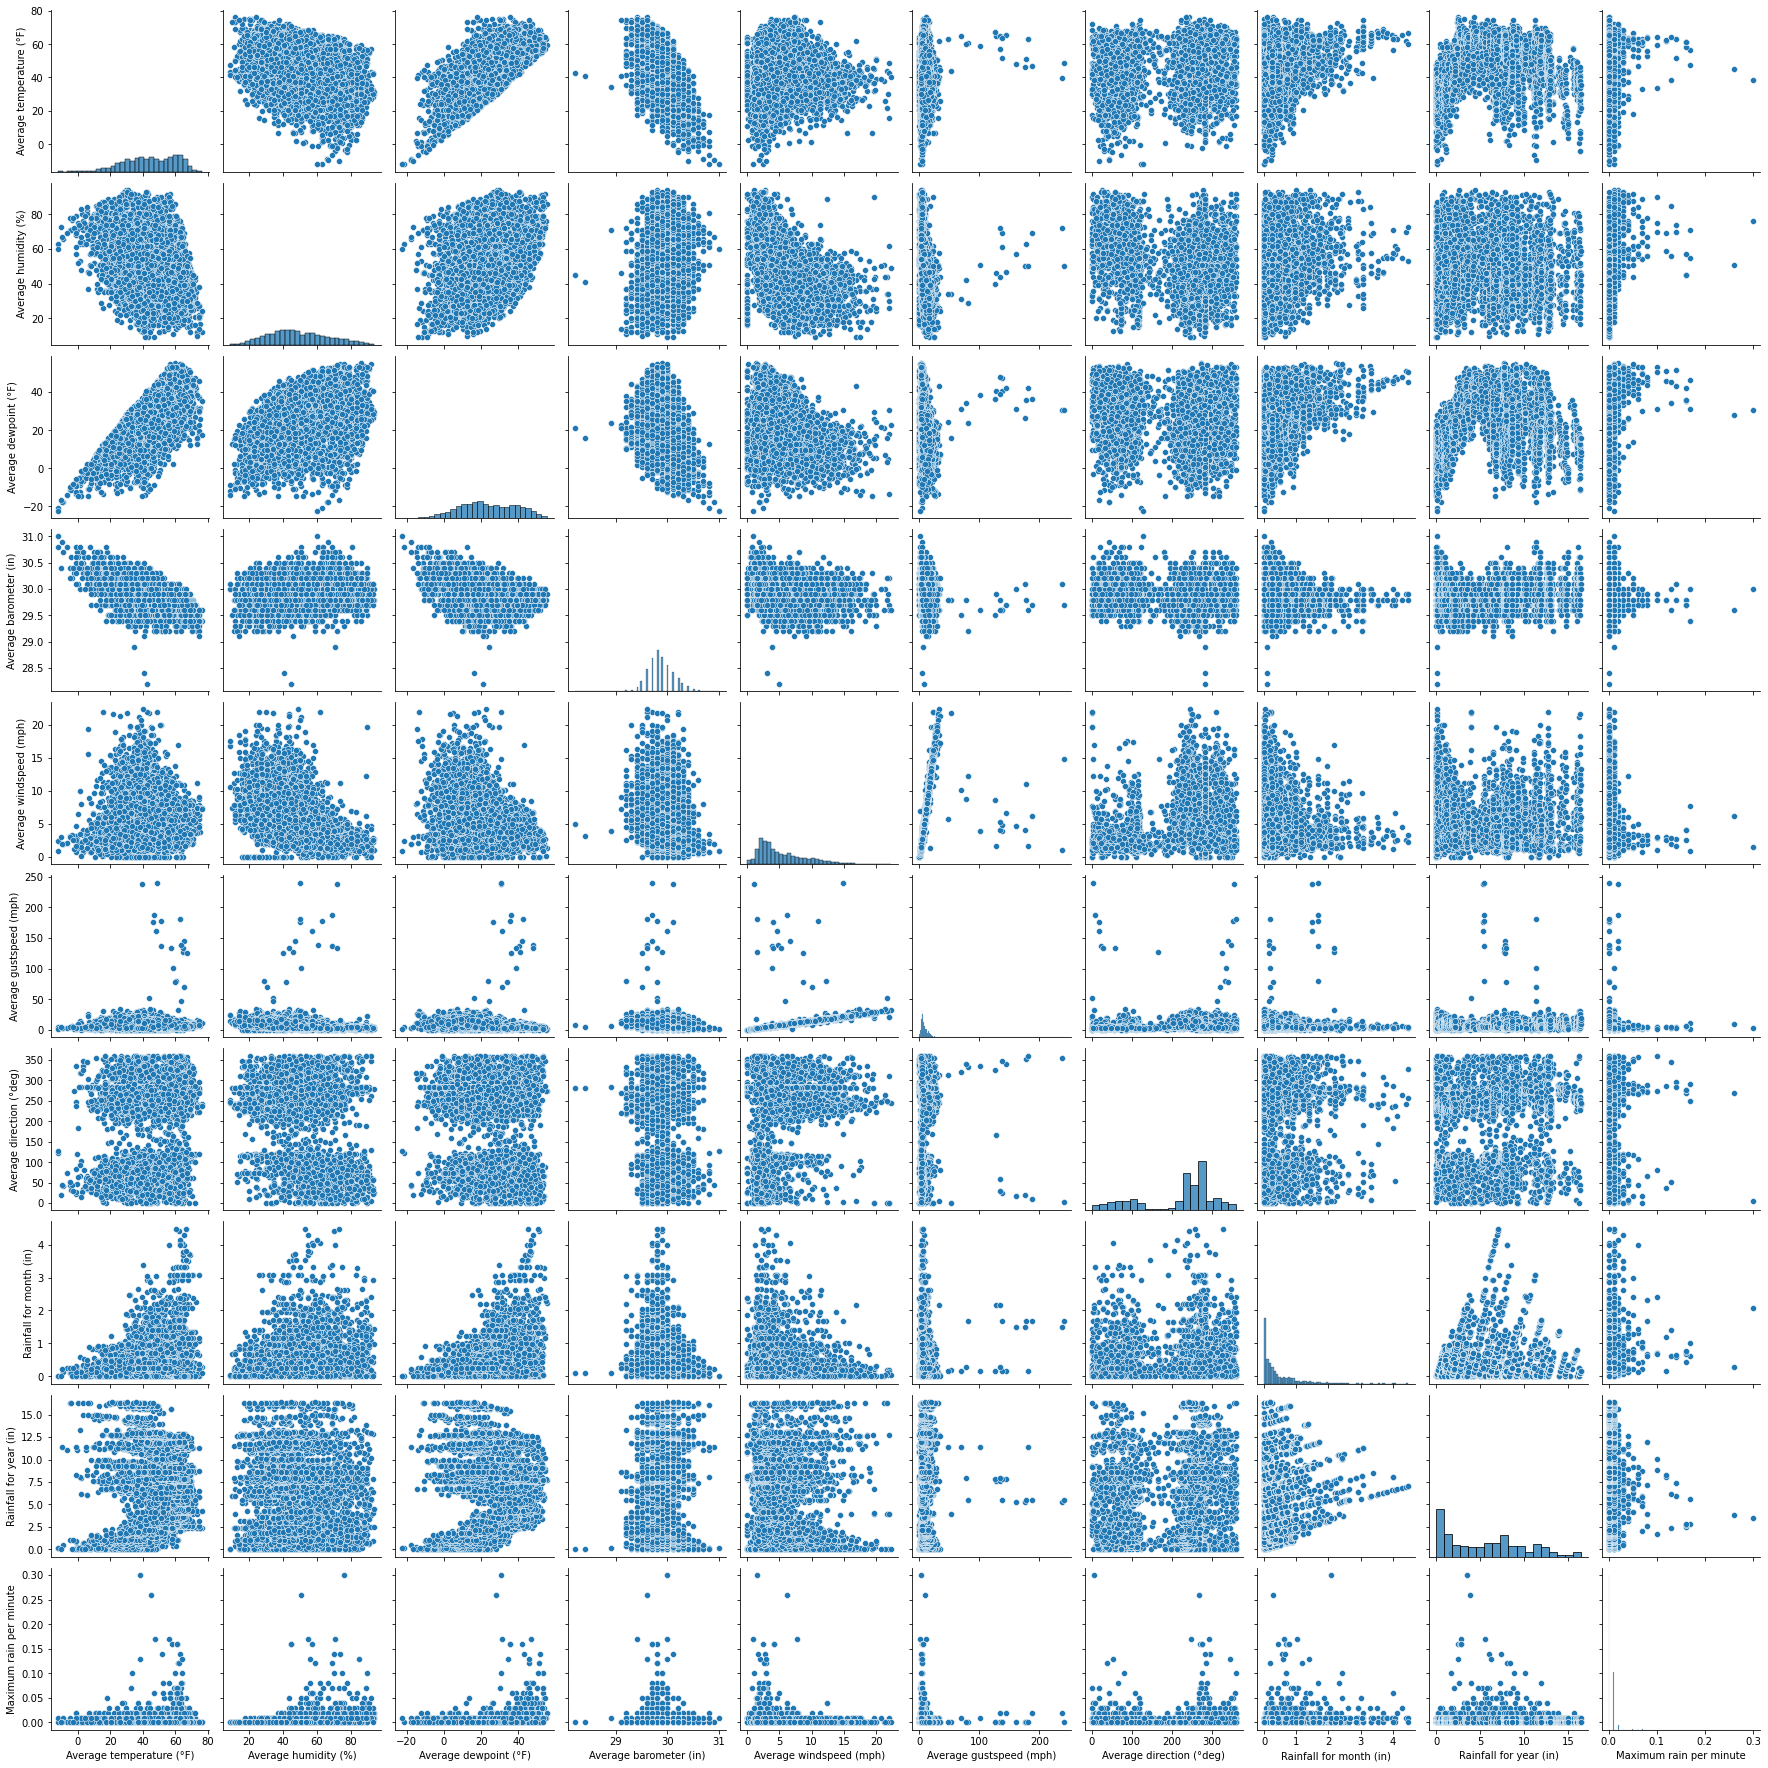

In [8]:
sns.pairplot(weather.iloc[:,:10])